In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.4,drugY
1,47,M,LOW,HIGH,13.1,drugC
2,47,M,LOW,HIGH,10.1,drugC
3,28,F,NORMAL,HIGH,7.8,drugX
4,61,F,LOW,HIGH,18.0,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.6,drugC
196,16,M,LOW,HIGH,12.0,drugC
197,52,M,NORMAL,HIGH,9.9,drugX
198,23,M,NORMAL,NORMAL,14.0,drugX


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.3150,16.544315,15.0,31.0,45.0,58.0,74.0
Na_to_K,200.0,16.0865,7.224551,6.3,10.4,13.9,19.4,38.2


In [5]:
df.describe(include="O").T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,drugY,91


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Data Cleaning

In [8]:
for i in df.columns:
    fig=px.histogram(data_frame= df, x= i, title= i)
    fig.show()

In [9]:
for i in df.select_dtypes(exclude="O"):
    fig=px.box(data_frame= df, x= i, title= i)
    fig.show()

# Data Preprocessing

### Split Data into Input Features and Target Column

In [10]:
x=df.drop("Drug",axis=1)
y=df["Drug"]

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [12]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
25,28,F,HIGH,NORMAL,18.8
153,72,F,LOW,NORMAL,14.6
132,49,M,LOW,NORMAL,13.6
167,57,F,NORMAL,HIGH,14.2
140,49,M,HIGH,NORMAL,6.3
...,...,...,...,...,...
107,42,M,LOW,HIGH,20.0
106,22,M,NORMAL,HIGH,12.0
119,61,F,HIGH,HIGH,25.5
194,46,F,HIGH,HIGH,34.7


* Handle numerical Columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

mx=MinMaxScaler()
x_train[['Age','Na_to_K']]=mx.fit_transform(x_train[['Age','Na_to_K']])
x_test[['Age','Na_to_K']]=mx.transform(x_test[['Age','Na_to_K']])

In [14]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
25,0.220339,F,HIGH,NORMAL,0.391850
153,0.966102,F,LOW,NORMAL,0.260188
132,0.576271,M,LOW,NORMAL,0.228840
167,0.711864,F,NORMAL,HIGH,0.247649
140,0.576271,M,HIGH,NORMAL,0.000000
...,...,...,...,...,...
107,0.457627,M,LOW,HIGH,0.429467
106,0.118644,M,NORMAL,HIGH,0.178683
119,0.779661,F,HIGH,HIGH,0.601881
194,0.525424,F,HIGH,HIGH,0.890282


* Handle Categorical Columns

In [15]:
for i in x_train.select_dtypes(include="O"):
    print(i)
    print(x_train[i].nunique())
    print(x_train[i].unique())
    print("_"*50)

Sex
2
['F' 'M']
__________________________________________________
BP
3
['HIGH' 'LOW' 'NORMAL']
__________________________________________________
Cholesterol
2
['NORMAL' 'HIGH']
__________________________________________________


In [16]:
cat_cols=x_train.select_dtypes(include="O").columns
cat_cols

Index(['Sex', 'BP', 'Cholesterol'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:

    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

# Machine Learning

* Naive Bayes
- GaussianNB

In [18]:
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , GaussianNB , CategoricalNB
from sklearn.metrics import classification_report , confusion_matrix


ga_nb=GaussianNB()   
ga_nb.fit(x_train,y_train)

print("Train Score \n",classification_report(y_train,ga_nb.predict(x_train)),"_"*50)
print("Test Score \n",classification_report(y_test,ga_nb.predict(x_test)))

Train Score 
               precision    recall  f1-score   support

       drugA       0.62      1.00      0.77        18
       drugB       0.65      1.00      0.79        13
       drugC       0.62      1.00      0.76        13
       drugX       1.00      0.98      0.99        43
       drugY       0.98      0.64      0.78        73

    accuracy                           0.83       160
   macro avg       0.77      0.92      0.82       160
weighted avg       0.89      0.83      0.83       160
 __________________________________________________
Test Score 
               precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      1.00      1.00         3
       drugC       0.50      1.00      0.67         3
       drugX       0.85      1.00      0.92        11
       drugY       1.00      0.67      0.80        18

    accuracy                           0.85        40
   macro avg       0.84      0.93      0.86        40

- MixedNB

In [19]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [20]:
cat_indces=x_train.columns.get_indexer (['Sex','BP','Cholesterol']).tolist()
cat_indces

[1, 2, 3]

In [21]:
from mixed_naive_bayes import MixedNB

mx_nb=MixedNB(categorical_features=cat_indces)
mx_nb.fit(x_train,y_train)

print("Train Score \n",classification_report(y_train,mx_nb.predict(x_train)),"_"*50)
print("Test Score \n",classification_report(y_test,mx_nb.predict(x_test)))


Train Score 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        73

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160
 __________________________________________________
Test Score 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.85      1.00      0.92        11
           4       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.97      0.98      0.97        40

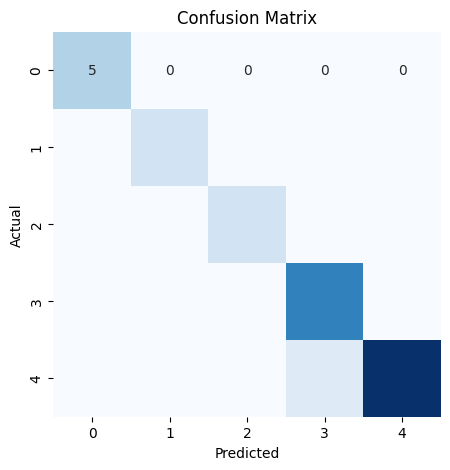

In [23]:
confusion_mat = confusion_matrix(y_test, mx_nb.predict(x_test))

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix
import plotly.express as px

confusion_mat = confusion_matrix(y_test, mx_nb.predict(x_test))

px.imshow(confusion_mat, width= 500, height= 500, text_auto= True)